In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as sm

################ include this code when importing your libraries 

pd.set_option('display.max_columns', None) ## show all the columns in dataset
pd.set_option('display.max_rows', None) ## show all rows in dataset

################

df = pd.read_excel("IBM Employee Attrition.xlsx")

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,3,2,Sales Executive,4,Single,5993,8,Y,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,2,2,Research Scientist,2,Married,5130,1,Y,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Y,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,3,1,Research Scientist,3,Married,2909,1,Y,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,3,1,Laboratory Technician,2,Married,3468,9,Y,No,12,3,4,1,6,3,3,2,2,2,2


In [7]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


No     1233
Yes     237
Name: Attrition, dtype: int64


<AxesSubplot:xlabel='Attrition', ylabel='count'>

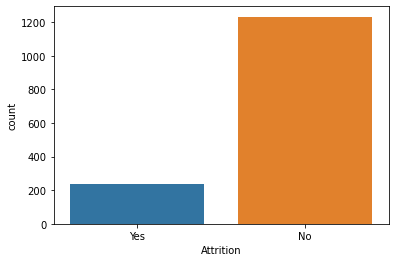

In [2]:
## check the coding of the dependent variable
## the value coded as "1" should represent to the presence of the event

###

print(df["Attrition"].value_counts())

###

sns.countplot(data = df, x = "Attrition")

In [12]:
df.corr()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.001686,0.208034,-0.010145,0.010146,0.029820,0.509604,-0.004892,0.497855,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DistanceFromHome,-0.001686,1.000000,0.021042,0.032916,-0.016075,0.008783,0.005303,-0.003669,-0.017014,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.021042,1.000000,0.042070,-0.027128,0.042438,0.101589,-0.011296,0.094961,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,0.032916,0.042070,1.000000,0.017621,-0.006888,-0.018519,-0.046247,-0.014829,-0.001251,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,0.017621,1.000000,-0.008278,0.001212,-0.006784,-0.006259,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
JobInvolvement,0.029820,0.008783,0.042438,-0.006888,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.005303,0.101589,-0.018519,0.001212,-0.012630,1.000000,-0.001944,0.950300,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.046247,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,-0.017014,0.094961,-0.014829,-0.006259,-0.015271,0.950300,-0.007157,1.000000,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079
NumCompaniesWorked,0.299635,-0.029251,0.126317,-0.001251,0.012594,0.015012,0.142501,-0.055699,0.149515,1.000000,-0.010238,-0.014095,0.052733,0.030075,0.237639,-0.066054,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319


In [43]:
#Linear Regression
#result=sm.ols('Attrition~Age+DistanceFromHome+YearsAtCompany+YearsSinceLastPromotion+YearsWithCurrManager',
              #data=df).fit()
#result=sm.ols('Attrition~Age+YearsAtCompany+YearsSinceLastPromotion+YearsWithCurrManager',
#              data=df).fit()
result=sm.ols('Attrition~Age',
              data=df).fit()

In [31]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Attrition   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     16.48
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           7.37e-16
Time:                        05:47:39   Log-Likelihood:                -575.02
No. Observations:                1470   AIC:                             1162.
Df Residuals:                    1464   BIC:                             1194.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.3889      0.041      9.505      0.000       0.309       0.469
Age                        -0.0056      0.001     -5.156      0.000      -0.008      -0.003
DistanceFromHome            0.0036      0.001      3.116      0.002       0.001       0.006
YearsAtCompany             -0.0020      0.003     -0.761      0.447      -0.007       0.003
YearsSinceLastPromotion     0.0108      0.004      2.909      0.004       0.004       0.018
YearsWithCurrManager       -0.0156      0.004     -3.787      0.000      -0.024      -0.008
==============================================================================
Omnibus:                      404.413   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              805.244
Skew:                           1.702   Prob(JB):                    1.39e-175
Kurtosis:                       4.251   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Logistic Regression
mod1 = sm.logit('Attrition ~ Age+MonthlyIncome + DistanceFromHome + TotalWorkingYears + EnvironmentSatisfaction + YearsSinceLastPromotion+JobSatisfaction+PercentSalaryHike+YearsAtCompany', data=df).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.401002
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1460
Method:                           MLE   Df Model:                            9
Date:                Tue, 30 Nov 2021   Pseudo R-squ.:                 0.09213
Time:                        05:53:36   Log-Likelihood:                -589.47
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.585e-21
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.5751      0.533      2.958      0.003       0.531       2.619
Age                        -0.0273      0.011     -2.395      0.017      -0.050      -0.005
MonthlyIncome           -6.911e-05   3.02e-05     -2.288      0.022      -0.000   -9.92e-06
DistanceFromHome            0.0276      0.009      3.149      0.002       0.010       0.045
TotalWorkingYears          -0.0157      0.023     -0.696      0.487      -0.060       0.028
EnvironmentSatisfaction    -0.2808      0.067     -4.164      0.000      -0.413      -0.149
YearsSinceLastPromotion     0.1210      0.035      3.486      0.000       0.053       0.189
JobSatisfaction            -0.2730      0.066     -4.108      0.000      -0.403      -0.143
PercentSalaryHike          -0.0185      0.021     -0.898      0.369      -0.059       0.022
YearsAtCompany             -0.0830      0.026     -3.202      0.001      -0.134      -0.032
===========================================================================================
"""

In [47]:
 ## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

df_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

df_odds["Sig"] = np.where(df_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df_odds

,OR,pvalue,Sig
Intercept,4.831280,0.003100,Sig
Age,0.973090,0.016598,Sig
MonthlyIncome,0.999931,0.022111,Sig
DistanceFromHome,1.028008,0.001639,Sig
TotalWorkingYears,0.984455,0.486518,Not Sig
EnvironmentSatisfaction,0.755171,0.000031,Sig
YearsSinceLastPromotion,1.128612,0.000489,Sig
JobSatisfaction,0.761056,0.000040,Sig
PercentSalaryHike,0.981661,0.369073,Not Sig
YearsAtCompany,0.920384,0.001365,Sig


In [ ]:
#ATTRITION - YES = 1

Attrition
0    2.771290
1    2.464135
Name: EnvironmentSatisfaction, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='EnvironmentSatisfaction'>

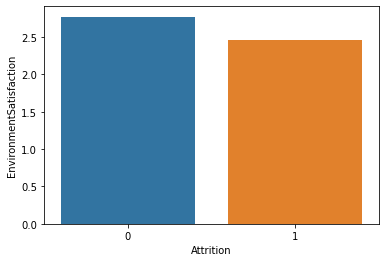

In [81]:
#df["EnvironmentSatisfaction"].groupby(df["Attrition"]).mean()
print(df["EnvironmentSatisfaction"].groupby(df["Attrition"]).mean())
sns.barplot(data = df, x = "Attrition", y = "EnvironmentSatisfaction", ci = None)

Attrition
0    2.778589
1    2.468354
Name: JobSatisfaction, dtype: float64


<AxesSubplot:xlabel='Attrition', ylabel='JobSatisfaction'>

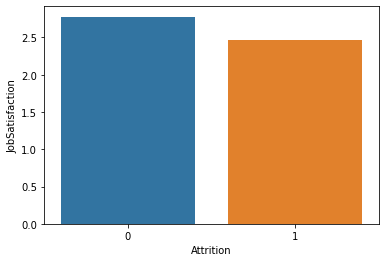

In [82]:
#df["EnvironmentSatisfaction"].groupby(df["Attrition"]).mean()
print(df["JobSatisfaction"].groupby(df["Attrition"]).mean())
sns.barplot(data = df, x = "Attrition", y = "JobSatisfaction", ci = None)

In [64]:
mod1.predict({'Age':33,
              'MonthlyIncome': 6000,
             'DistanceFromHome':23,
             'TotalWorkingYears':11,
             'EnvironmentSatisfaction':1,
              'YearsSinceLastPromotion':10,
             'JobSatisfaction':1,
              'PercentSalaryHike':0,
             'YearsAtCompany':10})

0    0.634047
dtype: float64

In [80]:
mod1.predict({'Age':38,
              'MonthlyIncome': 4000,
             'DistanceFromHome':5,
             'TotalWorkingYears':17,
             'EnvironmentSatisfaction':1,
              'YearsSinceLastPromotion':5,
             'JobSatisfaction':1,
              'PercentSalaryHike':0,
             'YearsAtCompany':5})

0    0.442781
dtype: float64

In [96]:
mod1.predict({'Age':30,
              'MonthlyIncome': 6000,
             'DistanceFromHome':15,
             'TotalWorkingYears':10,
             'EnvironmentSatisfaction':1,
              'YearsSinceLastPromotion':5,
             'JobSatisfaction':1,
              'PercentSalaryHike':1,
             'YearsAtCompany':10})

0    0.450831
dtype: float64

In [94]:
mod1.predict({'Age':25,
              'MonthlyIncome': 3000,
             'DistanceFromHome':15,
             'TotalWorkingYears':4,
             'EnvironmentSatisfaction':1,
              'YearsSinceLastPromotion':4,
             'JobSatisfaction':1,
              'PercentSalaryHike':0,
             'YearsAtCompany':4})

0    0.653786
dtype: float64

In [ ]:
#Younger employees with low job/environment satisfaction and no or not recent promotion 
#Appears to be a combination of age (younger), job and environment satisfaction and promotion/salary hike issues